In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
data = pd.read_csv('./data/Melbourne_housing_FULL.csv')
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


## Data cleaning

In [3]:
data.isna().sum(axis=0)

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

We see some missing data in the target feature. Filling with mean/mode can affect model performance on new real data.
Instead, just drop data-entries with unkown target values.

In [4]:
data.dropna(subset=['Price', 'Longtitude', 'Lattitude'], axis=0, inplace=True)
data.drop(['Method', 'Date', 'SellerG', 'Postcode'], axis=1, inplace=True)

# Features that had 2/3 of missing data. Data filling methods at this point are useless
data.drop(['YearBuilt', 'BuildingArea'], axis=1, inplace=True)

data.reset_index(inplace=True, drop=True)
data

,Suburb,Address,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,2.5,3.0,2.0,1.0,94.0,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20988,Yarraville,78 Bayview Rd,3,h,1101000.0,6.3,3.0,1.0,NaN,288.0,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
20989,Yarraville,13 Burns St,4,h,1480000.0,6.3,4.0,1.0,3.0,593.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
20990,Yarraville,29A Murray St,2,h,888000.0,6.3,2.0,2.0,1.0,98.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
20991,Yarraville,147A Severn St,2,t,705000.0,6.3,2.0,1.0,2.0,220.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [5]:
geo_features = ['Lattitude', 'Longtitude', 'CouncilArea', 'Address', 'Suburb']
position_data = data[geo_features]
data.drop(geo_features, axis=1, inplace=True)

In [6]:
position_data.nunique()

Lattitude      11366
Longtitude     12275
CouncilArea       33
Address        20613
Suburb           338
dtype: int64

In [7]:
cat_feat = [f for f in data.columns if data.dtypes[f] == 'object']
num_feat = [f for f in data.columns if f not in cat_feat]

for f in cat_feat:
    data[f] = data[f].fillna(method='ffill')
    
for f in num_feat:
    data[f] = data[f].fillna(data[f].median())
    
cat_data = data[cat_feat]
num_data = data[num_feat]

/tmp/ipykernel_30584/3489068381.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f] = data[f].fillna(method='ffill')


(array([1.4109e+04, 5.8390e+03, 8.2400e+02, 1.5400e+02, 4.8000e+01,
        1.4000e+01, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   85000.,  1196500.,  2308000.,  3419500.,  4531000.,  5642500.,
         6754000.,  7865500.,  8977000., 10088500., 11200000.]),
 <BarContainer object of 10 artists>)

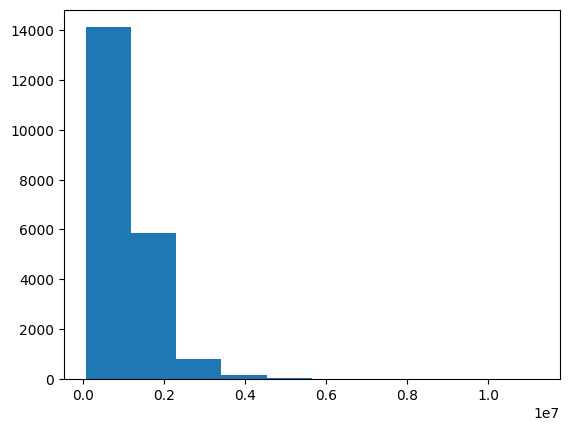

In [8]:
import matplotlib.pyplot as plt

plt.hist(data['Price'])

Traget column [Price] contains dangerous outliers, which may negatively affect model training.
Because of that, we remove everything beyond the 3*σ range.

(array([ 568., 4592., 5467., 3285., 2408., 1359.,  705.,  470.,  243.,
         170.]),
 array([  85000.,  380500.,  676000.,  971500., 1267000., 1562500.,
        1858000., 2153500., 2449000., 2744500., 3040000.]),
 <BarContainer object of 10 artists>)

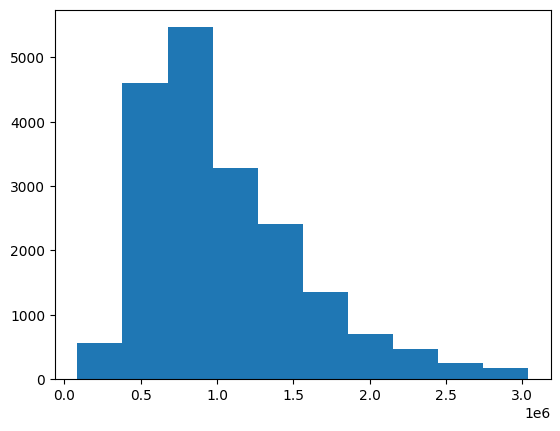

In [9]:
from scipy import stats

num_data = num_data[(np.abs(stats.zscore(num_data)) <= 3).all(axis=1)]
plt.hist(num_data['Price'])

Standardize numerical features and recombine data

In [10]:
print(geo_features)
data = pd.concat([num_data, cat_data.iloc[num_data.index]], axis=1).reset_index(drop=True)
position_data = position_data.iloc[num_data.index]

target = data['Price']
data.drop('Price', axis=1, inplace=True)
num_feat.remove('Price')

data

['Lattitude', 'Longtitude', 'CouncilArea', 'Address', 'Suburb']


,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount,Type,Regionname
0,2,2.5,2.0,1.0,1.0,202.0,4019.0,h,Northern Metropolitan
1,2,2.5,2.0,1.0,0.0,156.0,4019.0,h,Northern Metropolitan
2,3,2.5,3.0,2.0,0.0,134.0,4019.0,h,Northern Metropolitan
3,3,2.5,3.0,2.0,1.0,94.0,4019.0,h,Northern Metropolitan
4,4,2.5,3.0,1.0,2.0,120.0,4019.0,h,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...
19262,3,6.3,3.0,1.0,2.0,288.0,6543.0,h,Western Metropolitan
19263,4,6.3,4.0,1.0,3.0,593.0,6543.0,h,Western Metropolitan
19264,2,6.3,2.0,2.0,1.0,98.0,6543.0,h,Western Metropolitan
19265,2,6.3,2.0,1.0,2.0,220.0,6543.0,t,Western Metropolitan


## Data preprocessing

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm_scaler = StandardScaler()
data[num_feat] = mm_scaler.fit_transform(data[num_feat])
data

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount,Type,Regionname
0,-1.126001,-1.384247,-1.123999,-0.868172,-0.764542,-0.585494,-0.813574,h,Northern Metropolitan
1,-1.126001,-1.384247,-1.123999,-0.868172,-1.955939,-0.677778,-0.813574,h,Northern Metropolitan
2,0.005816,-1.384247,0.017537,0.750316,-1.955939,-0.721913,-0.813574,h,Northern Metropolitan
3,0.005816,-1.384247,0.017537,0.750316,-0.764542,-0.802159,-0.813574,h,Northern Metropolitan
4,1.137632,-1.384247,0.017537,-0.868172,0.426855,-0.749999,-0.813574,h,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...
19262,0.005816,-0.758787,0.017537,-0.868172,0.426855,-0.412965,-0.152671,h,Western Metropolitan
19263,1.137632,-0.758787,1.159074,-0.868172,1.618252,0.198912,-0.152671,h,Western Metropolitan
19264,-1.126001,-0.758787,-1.123999,0.750316,-0.764542,-0.794135,-0.152671,h,Western Metropolitan
19265,-1.126001,-0.758787,-1.123999,-0.868172,0.426855,-0.549384,-0.152671,t,Western Metropolitan


One-hot encoding is applied to categorical features "Regionname" and "Type"

In [12]:
ohe = OneHotEncoder()

encoded_cat = ohe.fit_transform(data[cat_feat])
encoded_cat = pd.DataFrame(encoded_cat.todense(), columns=[str(i) for i in range(11)])
data.drop(cat_feat, axis=1, inplace=True)

data = pd.concat([data, encoded_cat], axis=1)
data

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount,0,1,2,3,4,5,6,7,8,9,10
0,-1.126001,-1.384247,-1.123999,-0.868172,-0.764542,-0.585494,-0.813574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.126001,-1.384247,-1.123999,-0.868172,-1.955939,-0.677778,-0.813574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.005816,-1.384247,0.017537,0.750316,-1.955939,-0.721913,-0.813574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.005816,-1.384247,0.017537,0.750316,-0.764542,-0.802159,-0.813574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.137632,-1.384247,0.017537,-0.868172,0.426855,-0.749999,-0.813574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19262,0.005816,-0.758787,0.017537,-0.868172,0.426855,-0.412965,-0.152671,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19263,1.137632,-0.758787,1.159074,-0.868172,1.618252,0.198912,-0.152671,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19264,-1.126001,-0.758787,-1.123999,0.750316,-0.764542,-0.794135,-0.152671,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19265,-1.126001,-0.758787,-1.123999,-0.868172,0.426855,-0.549384,-0.152671,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


For feature "YearBuilt" - apply segmentation into bins

In [13]:
# data['YearBuilt'] = pd.cut(data['YearBuilt'], bins=20, labels=range(20))

In [14]:
data.shape

(19267, 18)

Generate polynomial features for continuous data

In [15]:
from sklearn.preprocessing import PolynomialFeatures

pol_features = ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','Propertycount']

pol = PolynomialFeatures(degree=2, )
pol_extended = pol.fit_transform(data[pol_features])

data.drop(pol_features, axis=1, inplace=True)
data = pd.concat([data, pd.DataFrame(pol_extended, columns=[str(i) for i in range(pol_extended.shape[1])])], axis=1)

In [16]:
data

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.753723,0.663754,0.508310,0.706322,0.584525,0.447635,0.622011,0.342804,0.476343,0.661902
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.753723,1.698092,0.588428,0.706322,3.825698,1.325692,1.591301,0.459382,0.551422,0.661902
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.562974,-1.467572,-0.541663,-0.610437,3.825698,1.412018,1.591301,0.521158,0.587329,0.661902
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.562974,-0.573648,-0.601873,-0.610437,0.584525,0.613285,0.622011,0.643459,0.652616,0.661902
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.753723,-0.370584,0.651128,0.706322,0.182205,-0.320141,-0.347278,0.562499,0.610179,0.661902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19262,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.753723,-0.370584,0.358525,0.132545,0.182205,-0.176276,-0.065169,0.170540,0.063048,0.023309
19263,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.753723,-1.404922,-0.172690,0.132545,2.618740,0.321890,-0.247061,0.039566,-0.030368,0.023309
19264,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.562974,-0.573648,-0.595852,-0.114552,0.584525,0.607149,0.116724,0.630650,0.121242,0.023309
19265,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.753723,-0.370584,0.476960,0.132545,0.182205,-0.234507,-0.065169,0.301822,0.083875,0.023309


## Modelling

In [17]:
from sklearn.linear_model import RidgeCV, LinearRegression, Lasso, ElasticNetCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.8, random_state=42)

In [18]:
import warnings
warnings.filterwarnings(action='ignore')

model_1 = LinearRegression().fit(X_train, y_train)
model_2 = RidgeCV(alphas=np.linspace(0.05, 0.5, 10), cv=5).fit(X_train, y_train)
model_3 = Lasso(alpha=0.1).fit(X_train, y_train)
model_4 = ElasticNetCV(alphas=np.linspace(0.05, 1, 10), l1_ratio=0.5).fit(X_train, y_train)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f'MSE Regression: \tR^2 score = {model_1.score(X_test, y_test):.4f} | MSE = {mean_squared_error(y_test, model_1.predict(X_test)):.4e} | MAE = {mean_absolute_error(y_test, model_1.predict(X_test)):.4e}')
print(f'Ridge Regression: \tR^2 score = {model_2.score(X_test, y_test):.4f} | MSE = {mean_squared_error(y_test, model_2.predict(X_test)):.4e} | MAE = {mean_absolute_error(y_test, model_2.predict(X_test)):.4e}')      
print(f'Lasso Regression: \tR^2 score = {model_3.score(X_test, y_test):.4f} | MSE = {mean_squared_error(y_test, model_3.predict(X_test)):.4e} | MAE = {mean_absolute_error(y_test, model_3.predict(X_test)):.4e}')      
print(f'ElasticNet: \t\tR^2 score = {model_4.score(X_test, y_test):.4f} | MSE = {mean_squared_error(y_test, model_4.predict(X_test)):.4e} | MAE = {mean_absolute_error(y_test, model_4.predict(X_test)):.4e}')      

MSE Regression: 	R^2 score = 0.6612 | MSE = 9.2616e+10 | MAE = 2.2527e+05
Ridge Regression: 	R^2 score = 0.6612 | MSE = 9.2612e+10 | MAE = 2.2527e+05
Lasso Regression: 	R^2 score = 0.6612 | MSE = 9.2616e+10 | MAE = 2.2527e+05
ElasticNet: 		R^2 score = 0.6567 | MSE = 9.3863e+10 | MAE = 2.2680e+05


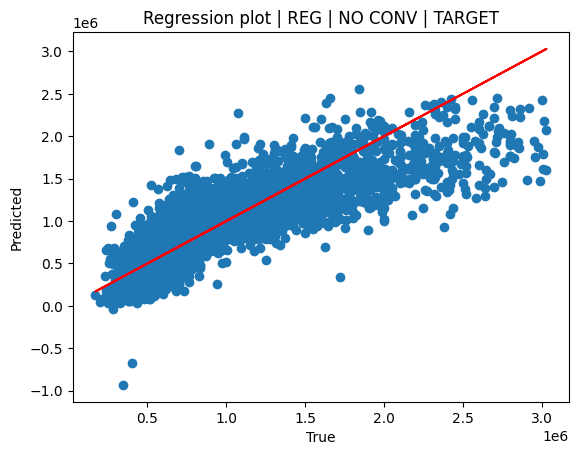

In [20]:
plt.title("Regression plot | REG | NO CONV | TARGET")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.scatter(y_test, model_1.predict(X_test))
plt.plot(y_test, y_test, 'r-')

In [21]:
y_test.describe()

count    3.854000e+03
mean     1.040318e+06
std      5.229324e+05
min      1.700000e+05
25%      6.510000e+05
50%      9.000000e+05
75%      1.319125e+06
max      3.030000e+06
Name: Price, dtype: float64